In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [41]:
pip install ISLP;

In [42]:
 data_url = "http://lib.stat.cmu.edu/datasets/boston"
 raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
 data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
 target = raw_df.values[1::2, 2]

Q10 A loading Boston Data

In [43]:
#loading BOston Data
from ISLP import load_data
boston = load_data('Boston')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [53]:
boston.zn.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

How many rows and columns? What
do the rows and columns represent?


In [44]:
#boston.head()
print("Number of rows:", boston.shape[0])
print("Number of Columns:", boston.shape[1])
boston.info()

Number of rows: 506
Number of Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.


In [45]:
crime_correlations = boston.corr()['crim'].drop('crim')
print("Correlation coefficients between 'crim' and other predictors:")
print(crime_correlations)

Correlation coefficients between 'crim' and other predictors:
zn        -0.200469
indus      0.406583
chas      -0.055892
nox        0.420972
rm        -0.219247
age        0.352734
dis       -0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
lstat      0.455621
medv      -0.388305
Name: crim, dtype: float64


any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?

Summary statistics for crime rates:
count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

Summary statistics for tax rates:
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

Summary statistics for pupil-teacher ratios:
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64


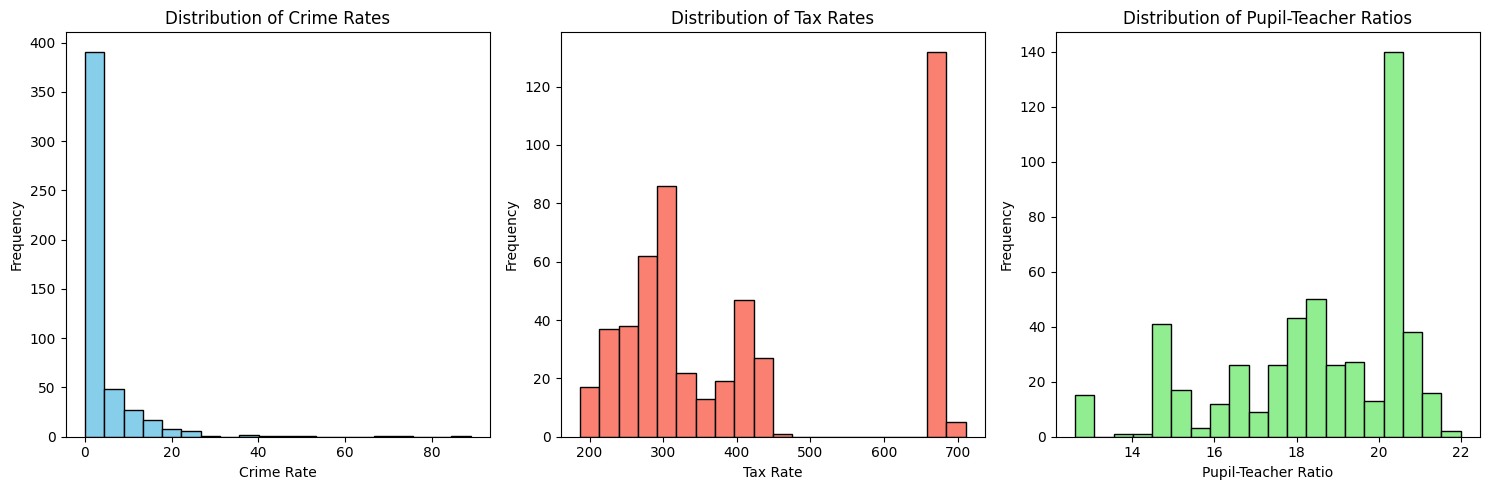

In [46]:
# Extract relevant columns
crime_rates = boston['crim']
tax_rates = boston['tax']
ptratios = boston['ptratio']

# Summary statistics
print("Summary statistics for crime rates:")
print(crime_rates.describe())

print("\nSummary statistics for tax rates:")
print(tax_rates.describe())

print("\nSummary statistics for pupil-teacher ratios:")
print(ptratios.describe())

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(crime_rates, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Crime Rates')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(tax_rates, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Tax Rates')
plt.xlabel('Tax Rate')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(ptratios, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratios')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Count the number of suburbs that bound the Charles River

In [47]:
# Count the number of suburbs that bound the Charles River
suburbs_bound_river = boston['chas'].sum()
suburbs_bound_river

35

What is the median pupil-teacher ratio among the towns in this
data set

In [48]:
#Q10()
md = np.median(boston['ptratio'])
md

19.05

Which suburb of Boston has lowest median value of owneroccupied homes

In [49]:
lowest_medv_suburb = boston[boston['medv'] == boston['medv'].min()]
lowest_medv_suburb


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


What are the values of the other predictors
for that suburb

In [50]:
min_medv_index = boston['medv'].idxmin()
lowest_medv_suburb = boston.loc[min_medv_index]
lowest_medv_suburb

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

how many of the suburbs average more than
seven rooms per dwelling?

In [51]:
more_than_seven_rooms = boston[boston['rm'] > 7].shape[0]
more_than_seven_rooms

64

More than eight rooms per dwelling?

In [52]:
#more_than_eight_rooms = boston[boston['rm'] > 8].shape[0]
#more_than_eight_rooms
more_than_eight_rooms = (boston['rm'] > 8).sum()
more_than_eight_rooms

13